# Projet Python 2 : Origines et évolution des prénoms en France

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
IMAGES_PATH = Path().resolve().parent / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
data_path = Path().resolve().parent / "data"

prenoms_data_a = pd.read_csv(data_path/"Prenoms.csv", delimiter=";", encoding='latin-1')
prenoms_data_b = pd.read_csv(data_path/"dpt2018.csv", delimiter=";")

In [4]:
prenoms_data_a

,01_prenom,02_genre,03_langage,04_fréquence
0,aaliyah,f,english (modern),0.0
1,aapeli,m,finnish,0.0
2,aapo,m,finnish,0.0
3,aaren,"m,f",english,0.0
4,aarne,m,finnish,0.0
...,...,...,...,...
11622,zvi,m,jewish,0.1
11623,zvonimir,m,croatian,0.0
11624,zvonimira,f,croatian,0.0
11625,zvonko,m,croatian,0.0


In [5]:
prenoms_data_b

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
...,...,...,...,...,...
3624989,2,ÉYA,2014,69,3
3624990,2,ÉYA,XXXX,XX,23
3624991,2,ÏNAYA,XXXX,XX,21
3624992,2,ÖZGE,XXXX,XX,30


In [6]:
#prenoms_data = prenoms_data_b.copy()
#prenoms_data["preusuel"] = prenoms_data["preusuel"].replace({"AADAM": "ADAM"})

#mode_annais = prenoms_data[prenoms_data['annais'] != 'XXXX'].groupby('preusuel')['annais'].agg(lambda x: x.mode().iloc[0]).reset_index()
#mode_annais.columns = ['preusuel', 'mode_annais']
#fusionnees_df = prenoms_data_b.merge(mode_annais, on='preusuel', how='left')
#fusionnees_df['annais'] = fusionnees_df.apply(lambda row: row['mode_annais'] if row['annais'] == 'XXXX' else row['annais'], axis=1)
#fusionnees_df.drop(columns=['mode_annais'], inplace=True)
#fusionnees_df

In [7]:
#dpt_data = fusionnees_df.copy()

#mode_dpt = dpt_data[dpt_data['dpt'] != 'XX'].groupby('preusuel')['dpt'].agg(lambda x: x.mode().iloc[0]).reset_index()
#mode_dpt.columns = ['preusuel', 'mode_dpt']
#fusionnees_dpt_df = fusionnees_df.merge(mode_dpt, on='preusuel', how='left')
#fusionnees_dpt_df['dpt'] = fusionnees_dpt_df.apply(lambda row: row['mode_dpt'] if row['dpt'] == 'XX' else row['dpt'], axis=1)
#fusionnees_dpt_df.drop(columns=['mode_dpt'], inplace=True)
#fusionnees_dpt_df

In [8]:
prenoms_france_data = prenoms_data_b.copy()
prenoms_france_data["preusuel"] = prenoms_france_data["preusuel"].replace({"AADAM": "ADAM"})

prenoms_france_data = prenoms_france_data.drop(prenoms_france_data.loc[prenoms_france_data['annais'] == "XXXX"].index)
prenoms_france_data = prenoms_france_data.sort_values(by=['annais'], ascending=True)
prenoms_france_data = prenoms_france_data.reset_index(drop=True)
prenoms_france_data["sexe"] = prenoms_france_data["sexe"].replace({1: "M", 2: "F"})
prenoms_france_data["dpt"] = prenoms_france_data["dpt"].replace({"XX": np.nan})
prenoms_france_data["preusuel"] = prenoms_france_data["preusuel"].str.capitalize()
prenoms_france_data

,sexe,preusuel,annais,dpt,nombre
0,M,Léon,1900,05,9
1,M,Charles,1900,18,23
2,F,Georgette,1900,01,6
3,F,Georgette,1900,02,65
4,F,Georgette,1900,03,14
...,...,...,...,...,...
3589381,M,Marwan,2018,92,9
3589382,M,Marwan,2018,93,14
3589383,M,Marwan,2018,94,6
3589384,M,Marwan,2018,78,5


In [9]:
#prenoms_france_data = fusionnees_dpt_df.copy()

#prenoms_france_data = prenoms_france_data.sort_values(by=['annais'], ascending=True)
#prenoms_france_data = prenoms_france_data.reset_index(drop=True)
#prenoms_france_data["sexe"] = prenoms_france_data["sexe"].replace({1: "M", 2: "F"})
#prenoms_france_data["dpt"] = prenoms_france_data["dpt"].replace({"XX": np.nan})
#prenoms_france_data["preusuel"] = prenoms_france_data["preusuel"].str.capitalize()
#prenoms_france_data = prenoms_france_data.dropna()
#prenoms_france_data

In [10]:
prenoms_france_data.isna().sum()

sexe        0
preusuel    0
annais      0
dpt         0
nombre      0
dtype: int64

### Quelle est la proportion totale Femmes / Hommes au cours du temps depuis 1900 ?

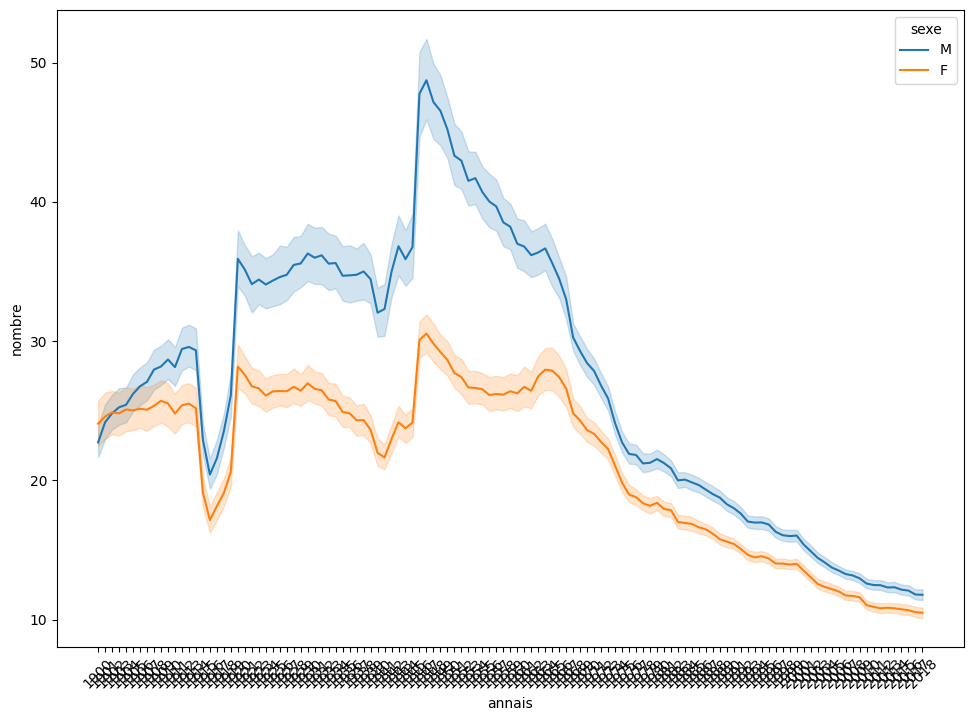

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=prenoms_france_data, x="annais", y="nombre", hue="sexe")
plt.xticks(rotation=45)
plt.show()

In [12]:
test = prenoms_france_data.groupby(["annais", "sexe"])["nombre"].sum().reset_index(name="nombre_sum")
test['cumsum'] = test.groupby(['sexe'])['nombre_sum'].cumsum()
test_cumsum = test.groupby('annais')['cumsum'].sum().reset_index(name="total_cumsum")
test_merged_df = pd.merge(test, test_cumsum, on='annais')
test_merged_df['proportion'] = test_merged_df['cumsum'] / test_merged_df['total_cumsum']
test_merged_df = test_merged_df.sort_values(by=['annais', 'sexe'])
test_merged_df

,annais,sexe,nombre_sum,cumsum,total_cumsum,proportion
0,1900,F,225100,225100,393432,0.572145
1,1900,M,168332,168332,393432,0.427855
2,1901,F,245022,470122,825164,0.569732
3,1901,M,186710,355042,825164,0.430268
4,1902,F,248817,718939,1269050,0.566517
...,...,...,...,...,...,...
233,2016,M,309316,38604674,75739765,0.509702
234,2017,F,271703,37406794,76313442,0.490173
235,2017,M,301974,38906648,76313442,0.509827
236,2018,F,266733,37673527,76877701,0.490045


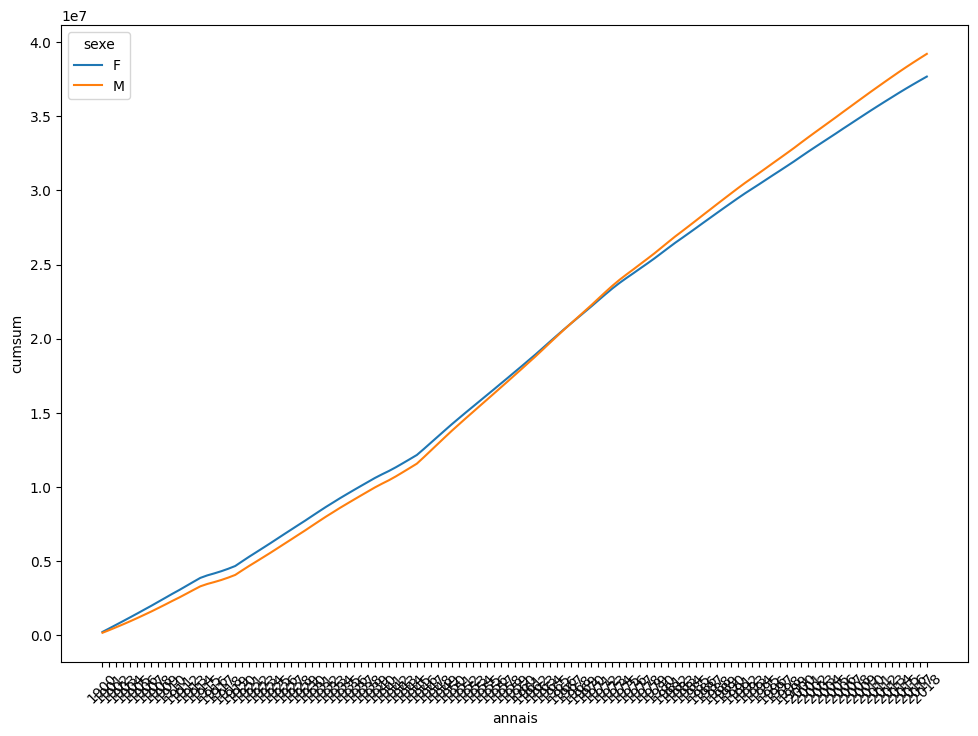

In [13]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=test, x="annais", y="cumsum", hue="sexe")
plt.xticks(rotation=45)
plt.show()

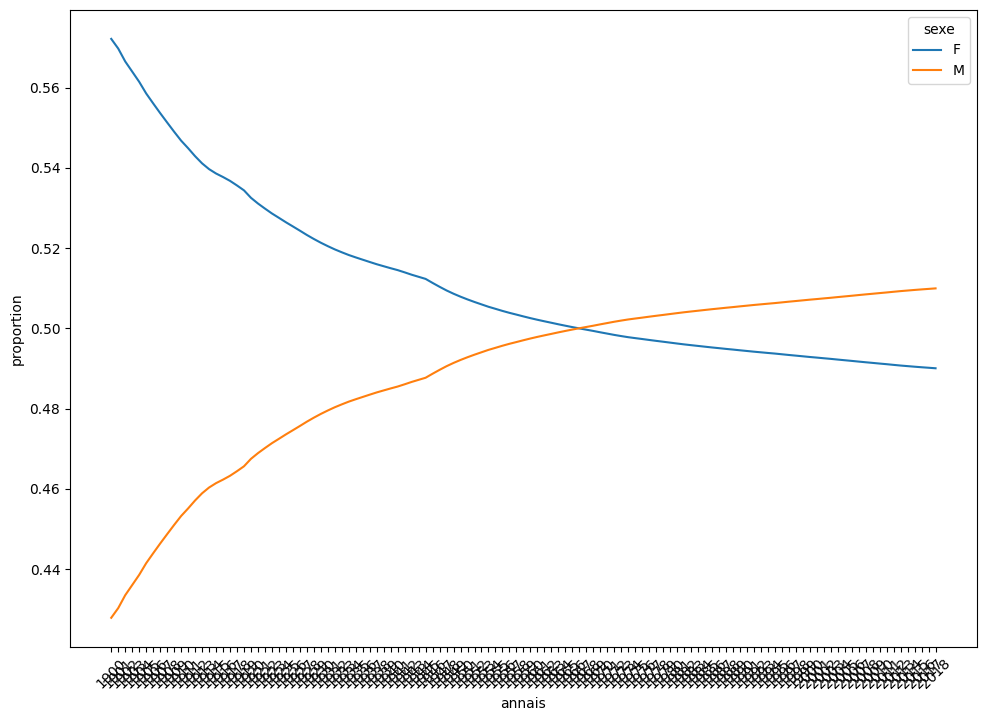

In [14]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=test_merged_df, x="annais", y="proportion", hue="sexe")
plt.xticks(rotation=45)
plt.show()

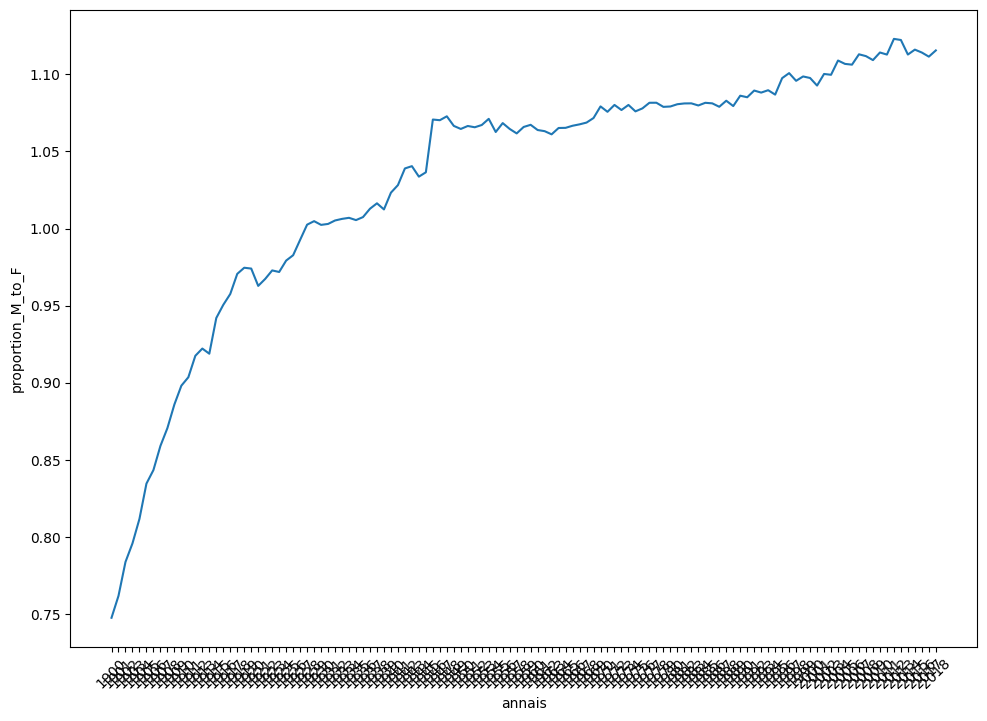

In [15]:
# Separar por sexo:
male_data = test[test['sexe'] == 'M'][['annais', 'nombre_sum']]
female_data = test[test['sexe'] == 'F'][['annais', 'nombre_sum']]

male_data = male_data.rename(columns={'nombre_sum': 'nombre_sum_M'})
female_data = female_data.rename(columns={'nombre_sum': 'nombre_sum_F'})

# Merge em 'annais'
merged_data = pd.merge(male_data, female_data, on='annais', how='inner')

# Calculamos a proporcao M para F
merged_data['proportion_M_to_F'] = merged_data['nombre_sum_M'] / merged_data['nombre_sum_F']

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=merged_data, x="annais", y="proportion_M_to_F")
plt.xticks(rotation=45)
plt.show()

### Evolution du prénom Marie dans le temps (nombre de naissances de Marie par an) ?

In [16]:
marie_data = prenoms_france_data.loc[prenoms_france_data["preusuel"] == "Marie"]
marie_data = marie_data.reset_index(drop=True)

In [17]:
marie_data_par_an = marie_data.groupby(["annais"])["nombre"].sum().reset_index(name="nombre_sum")
marie_data_par_an

,annais,nombre_sum
0,1900,49752
1,1901,53176
2,1902,52889
3,1903,51444
4,1904,51075
...,...,...
114,2014,1224
115,2015,1007
116,2016,935
117,2017,839


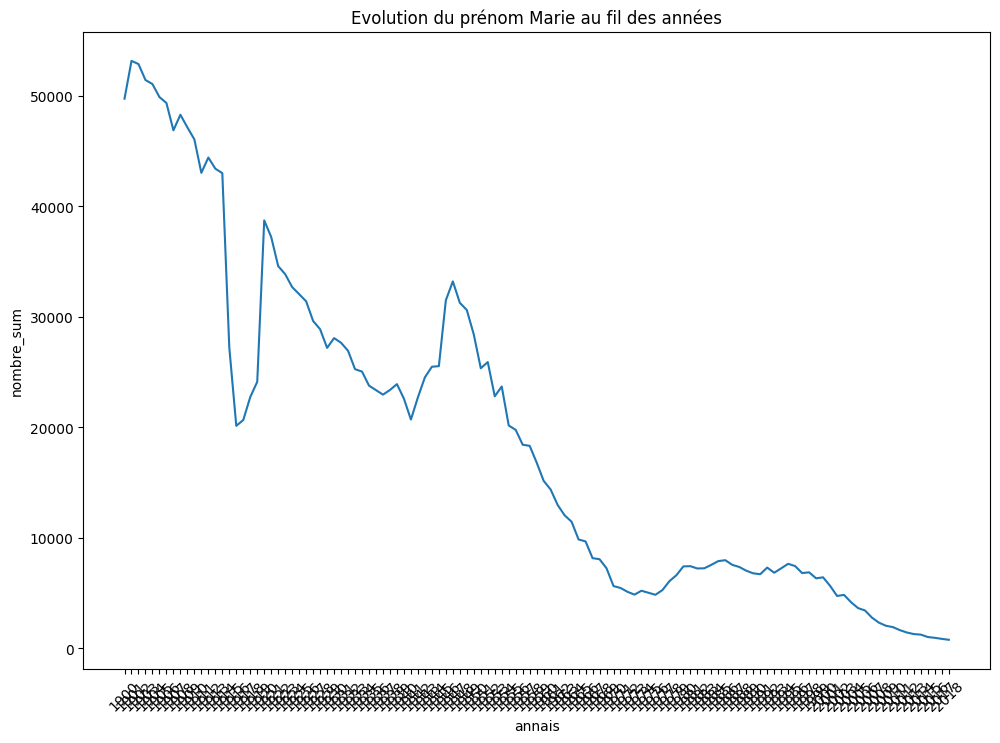

In [18]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=marie_data_par_an, x="annais", y="nombre_sum")
plt.xticks(rotation=45)
plt.title("Evolution du prénom Marie au fil des années")
plt.show()

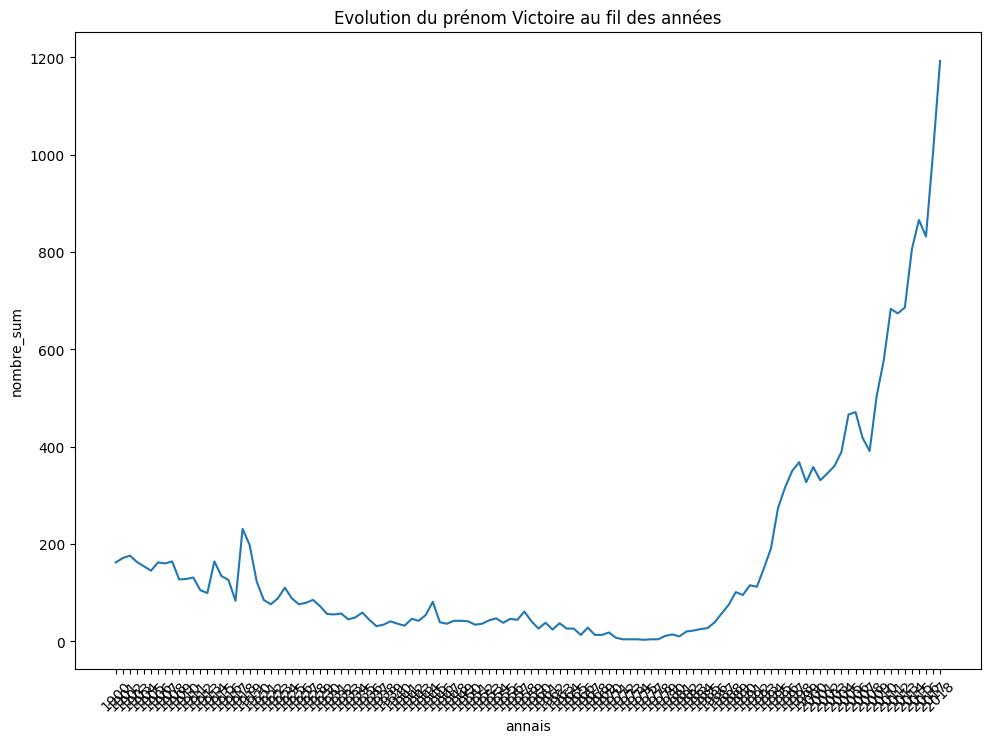

In [19]:
victoire_data = prenoms_france_data.loc[prenoms_france_data["preusuel"] == "Victoire"]
victoire_data = victoire_data.reset_index(drop=True)
victoire_data_par_an = victoire_data.groupby(["annais"])["nombre"].sum().reset_index(name="nombre_sum")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=victoire_data_par_an, x="annais", y="nombre_sum")
plt.xticks(rotation=45)
plt.title("Evolution du prénom Victoire au fil des années")
plt.show()

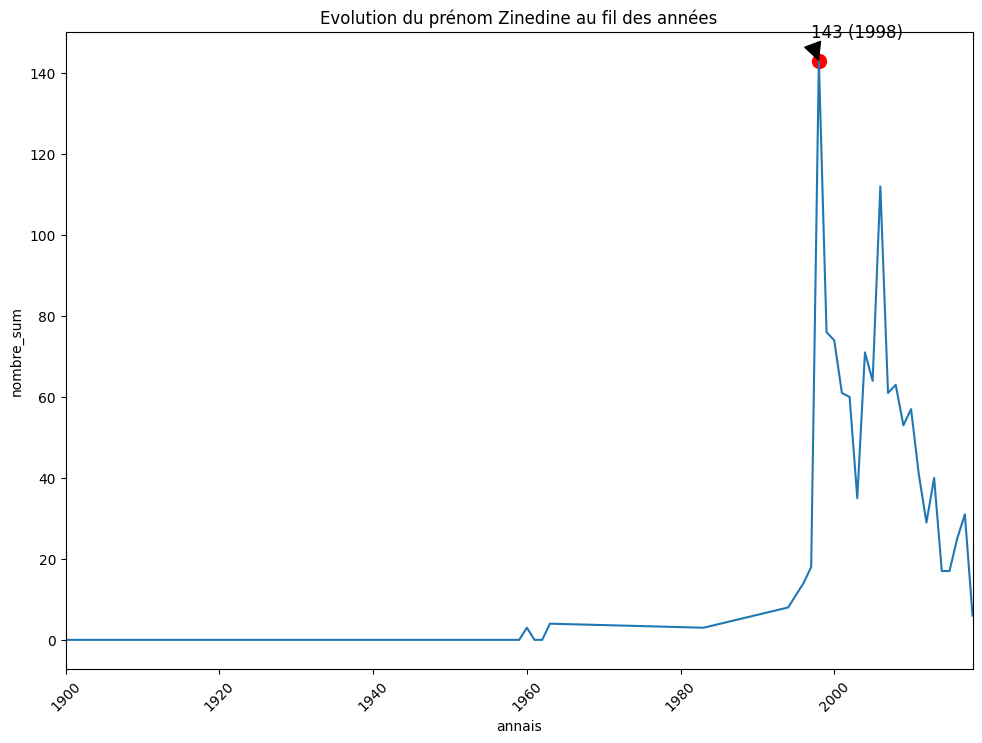

In [20]:
zinedine_data = prenoms_france_data.loc[prenoms_france_data["preusuel"] == "Zinedine"]
zinedine_data = zinedine_data.reset_index(drop=True)
zinedine_data_par_an = zinedine_data.groupby(["annais"])["nombre"].sum().reset_index(name="nombre_sum")
zinedine_data_par_an["annais"] = pd.to_numeric(zinedine_data_par_an["annais"])
years_full_range = pd.DataFrame({'annais': range(1900, 1963), 'nombre_sum': 0})

peak_annais = zinedine_data_par_an.loc[zinedine_data_par_an['nombre_sum'].idxmax()]['annais']
peak_annais = int(peak_annais)
peak_valeur = zinedine_data_par_an['nombre_sum'].max()

zinedine_data_par_an = pd.concat([years_full_range, zinedine_data_par_an]).drop_duplicates(subset='annais', keep='last').sort_values(by='annais')

#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#sns.lineplot(data=zinedine_data_par_an, x="annais", y="nombre_sum")
#plt.xticks(rotation=45)
#plt.title("Evolution du prénom Zinedine au fil des années")
#plt.show()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=zinedine_data_par_an, x="annais", y="nombre_sum", ax=ax)
ax.annotate(f'{peak_valeur} ({peak_annais})', xy=(peak_annais, peak_valeur), xytext=(peak_annais + 5, peak_valeur + 5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, ha='center', va='bottom')
ax.scatter(peak_annais, peak_valeur, color='red', s=100)
plt.xticks(rotation=45)
plt.xlim(1900, 2018)
plt.title("Evolution du prénom Zinedine au fil des années")
plt.show()

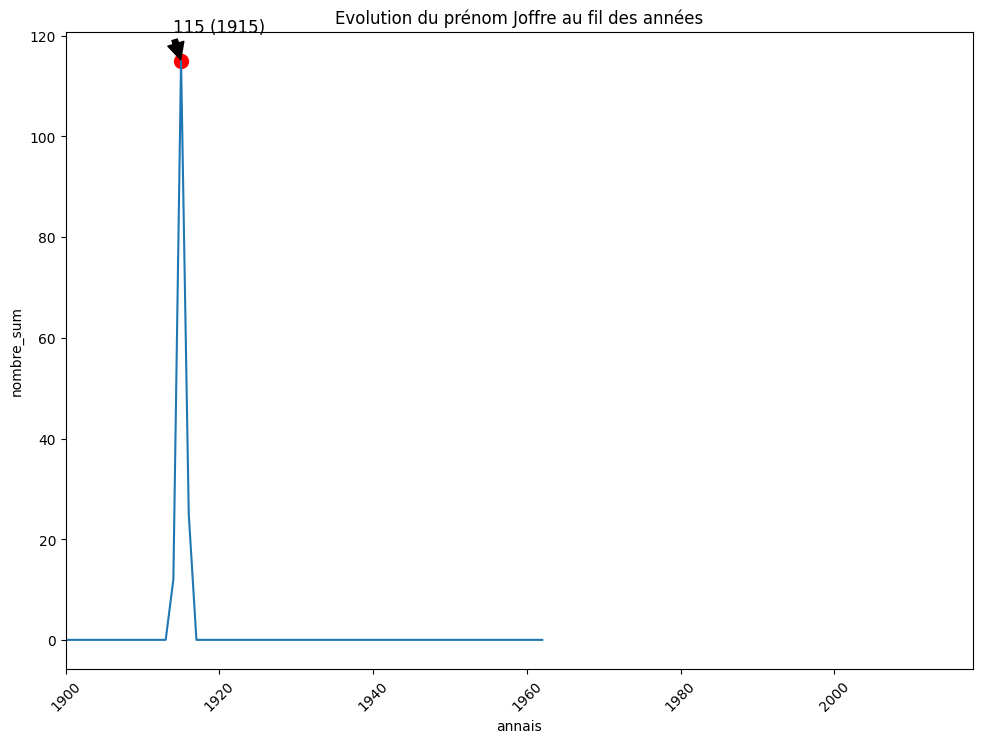

In [21]:
joffre_data = prenoms_france_data.loc[prenoms_france_data["preusuel"] == "Joffre"]
joffre_data = joffre_data.reset_index(drop=True)
joffre_data_par_an = joffre_data.groupby(["annais"])["nombre"].sum().reset_index(name="nombre_sum")
joffre_data_par_an["annais"] = pd.to_numeric(joffre_data_par_an["annais"])
years_full_range = pd.DataFrame({'annais': range(1900, 1963), 'nombre_sum': 0})

peak_annais = joffre_data_par_an.loc[joffre_data_par_an['nombre_sum'].idxmax()]['annais']
peak_annais = int(peak_annais)
peak_valeur = joffre_data_par_an['nombre_sum'].max()

joffre_data_par_an = pd.concat([years_full_range, joffre_data_par_an]).drop_duplicates(subset='annais', keep='last').sort_values(by='annais')

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=joffre_data_par_an, x="annais", y="nombre_sum", ax=ax)
ax.annotate(f'{peak_valeur} ({peak_annais})', xy=(peak_annais, peak_valeur), xytext=(peak_annais + 5, peak_valeur + 5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, ha='center', va='bottom')
ax.scatter(peak_annais, peak_valeur, color='red', s=100)
plt.xticks(rotation=45)
plt.xlim(1900, 2018)
plt.title("Evolution du prénom Joffre au fil des années")
plt.show()

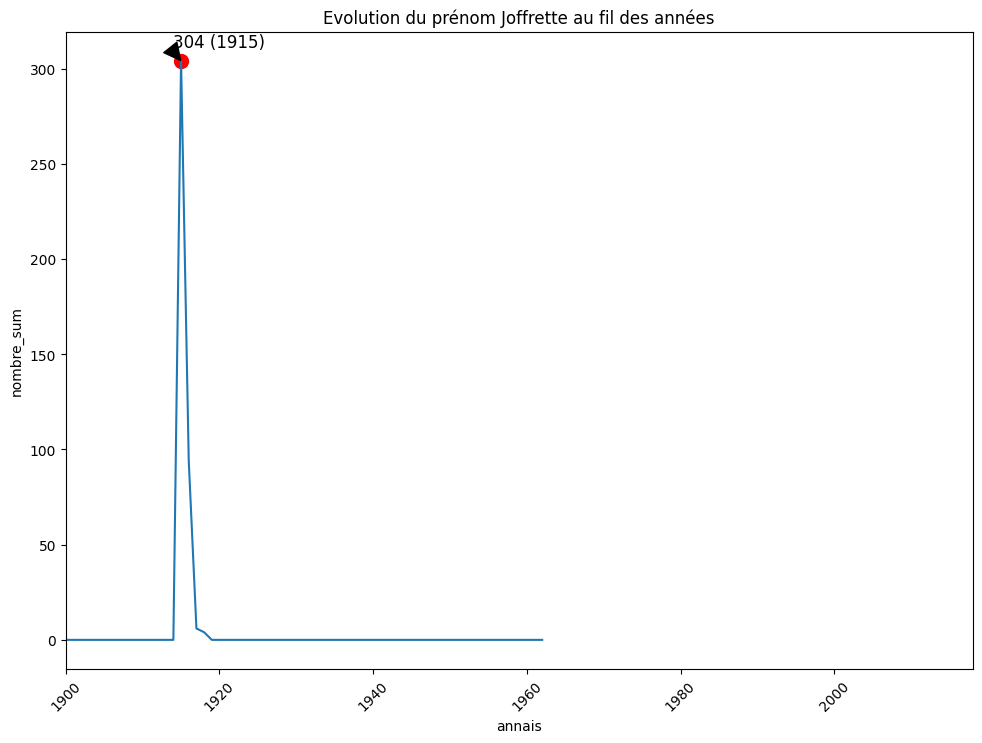

In [22]:
joffre_data = prenoms_france_data.loc[prenoms_france_data["preusuel"] == "Joffrette"]
joffre_data = joffre_data.reset_index(drop=True)
joffre_data_par_an = joffre_data.groupby(["annais"])["nombre"].sum().reset_index(name="nombre_sum")
joffre_data_par_an["annais"] = pd.to_numeric(joffre_data_par_an["annais"])
years_full_range = pd.DataFrame({'annais': range(1900, 1963), 'nombre_sum': 0})

peak_annais = joffre_data_par_an.loc[joffre_data_par_an['nombre_sum'].idxmax()]['annais']
peak_annais = int(peak_annais)
peak_valeur = joffre_data_par_an['nombre_sum'].max()

joffre_data_par_an = pd.concat([years_full_range, joffre_data_par_an]).drop_duplicates(subset='annais', keep='last').sort_values(by='annais')

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=joffre_data_par_an, x="annais", y="nombre_sum", ax=ax)
ax.annotate(f'{peak_valeur} ({peak_annais})', xy=(peak_annais, peak_valeur), xytext=(peak_annais + 5, peak_valeur + 5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, ha='center', va='bottom')
ax.scatter(peak_annais, peak_valeur, color='red', s=100)
plt.xticks(rotation=45)
plt.xlim(1900, 2018)
plt.title("Evolution du prénom Joffrette au fil des années")
plt.show()

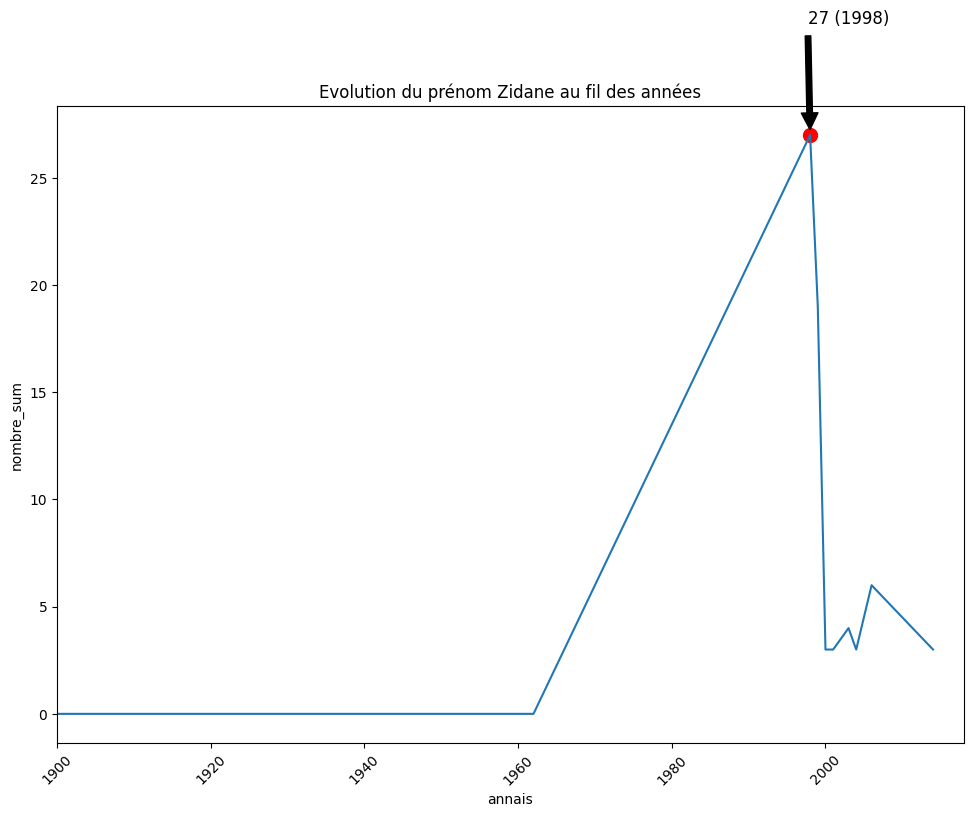

In [23]:
zinedine_data = prenoms_france_data.loc[prenoms_france_data["preusuel"] == "Zidane"]
zinedine_data = zinedine_data.reset_index(drop=True)
zinedine_data_par_an = zinedine_data.groupby(["annais"])["nombre"].sum().reset_index(name="nombre_sum")
zinedine_data_par_an["annais"] = pd.to_numeric(zinedine_data_par_an["annais"])
years_full_range = pd.DataFrame({'annais': range(1900, 1963), 'nombre_sum': 0})

peak_annais = zinedine_data_par_an.loc[zinedine_data_par_an['nombre_sum'].idxmax()]['annais']
peak_annais = int(peak_annais)
peak_valeur = zinedine_data_par_an['nombre_sum'].max()

zinedine_data_par_an = pd.concat([years_full_range, zinedine_data_par_an]).drop_duplicates(subset='annais', keep='last').sort_values(by='annais')

#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#sns.lineplot(data=zinedine_data_par_an, x="annais", y="nombre_sum")
#plt.xticks(rotation=45)
#plt.title("Evolution du prénom Zinedine au fil des années")
#plt.show()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=zinedine_data_par_an, x="annais", y="nombre_sum", ax=ax)
ax.annotate(f'{peak_valeur} ({peak_annais})', xy=(peak_annais, peak_valeur), xytext=(peak_annais + 5, peak_valeur + 5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, ha='center', va='bottom')
ax.scatter(peak_annais, peak_valeur, color='red', s=100)
plt.xticks(rotation=45)
plt.xlim(1900, 2018)
plt.title("Evolution du prénom Zidane au fil des années")
plt.show()

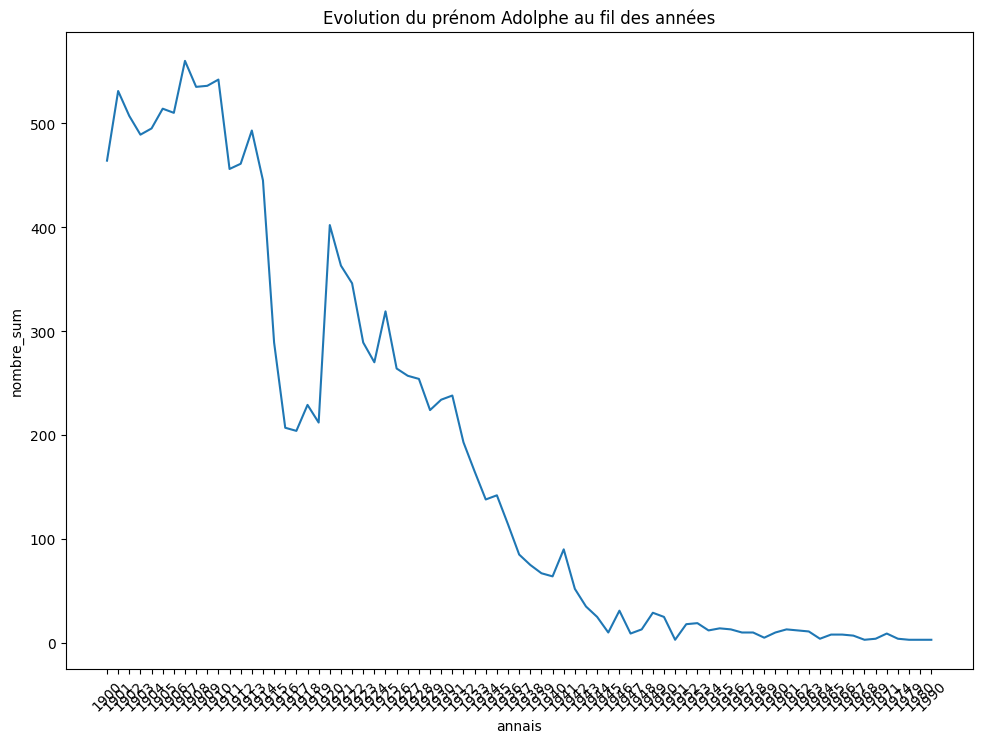

In [24]:
adolphe_data = prenoms_france_data.loc[prenoms_france_data["preusuel"] == "Adolphe"]
adolphe_data = adolphe_data.reset_index(drop=True)
adolphe_data_par_an = adolphe_data.groupby(["annais"])["nombre"].sum().reset_index(name="nombre_sum")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=adolphe_data_par_an, x="annais", y="nombre_sum")
plt.xticks(rotation=45)
plt.title("Evolution du prénom Adolphe au fil des années")
plt.show()

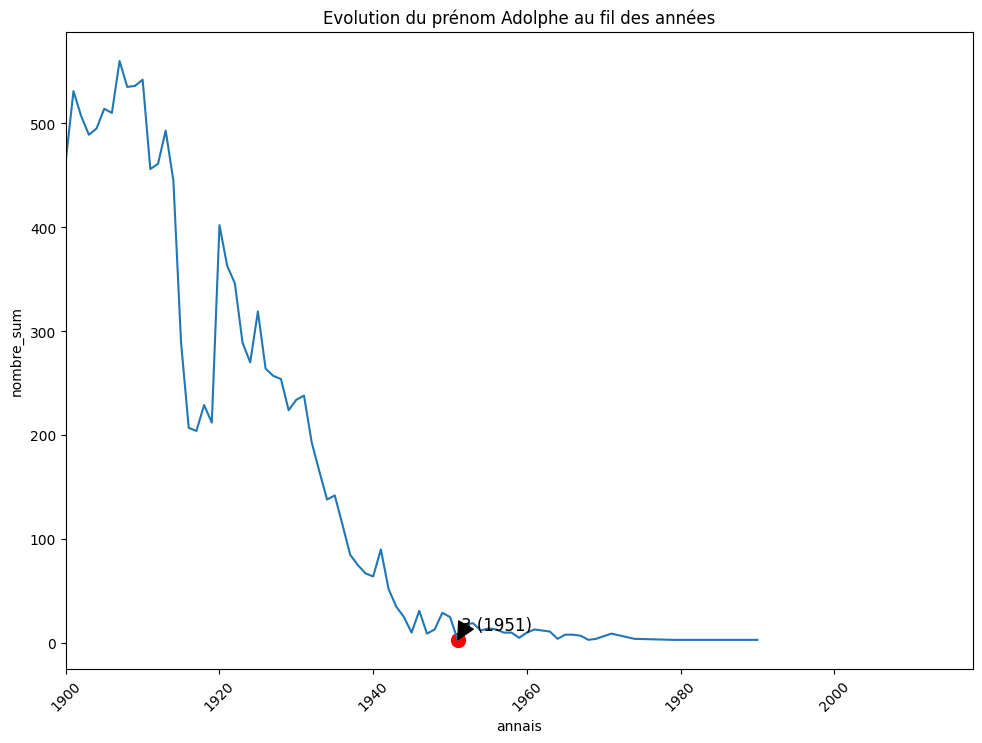

In [25]:
adolphe_data = prenoms_france_data.loc[prenoms_france_data["preusuel"] == "Adolphe"]
adolphe_data = adolphe_data.reset_index(drop=True)
adolphe_data_par_an = adolphe_data.groupby(["annais"])["nombre"].sum().reset_index(name="nombre_sum")
adolphe_data_par_an["annais"] = pd.to_numeric(adolphe_data_par_an["annais"])
years_full_range = pd.DataFrame({'annais': range(1900, 1963), 'nombre_sum': 0})

peak_annais = adolphe_data_par_an.loc[adolphe_data_par_an['nombre_sum'].idxmin()]['annais']
peak_annais = int(peak_annais)
peak_valeur = adolphe_data_par_an['nombre_sum'].min()

adolphe_data_par_an = pd.concat([years_full_range, adolphe_data_par_an]).drop_duplicates(subset='annais', keep='last').sort_values(by='annais')

#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
#sns.lineplot(data=zinedine_data_par_an, x="annais", y="nombre_sum")
#plt.xticks(rotation=45)
#plt.title("Evolution du prénom Zinedine au fil des années")
#plt.show()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=adolphe_data_par_an, x="annais", y="nombre_sum", ax=ax)
ax.annotate(f'{peak_valeur} ({peak_annais})', xy=(peak_annais, peak_valeur), xytext=(peak_annais + 5, peak_valeur + 5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, ha='center', va='bottom')
ax.scatter(peak_annais, peak_valeur, color='red', s=100)
plt.xticks(rotation=45)
plt.xlim(1900, 2018)
plt.title("Evolution du prénom Adolphe au fil des années")
plt.show()

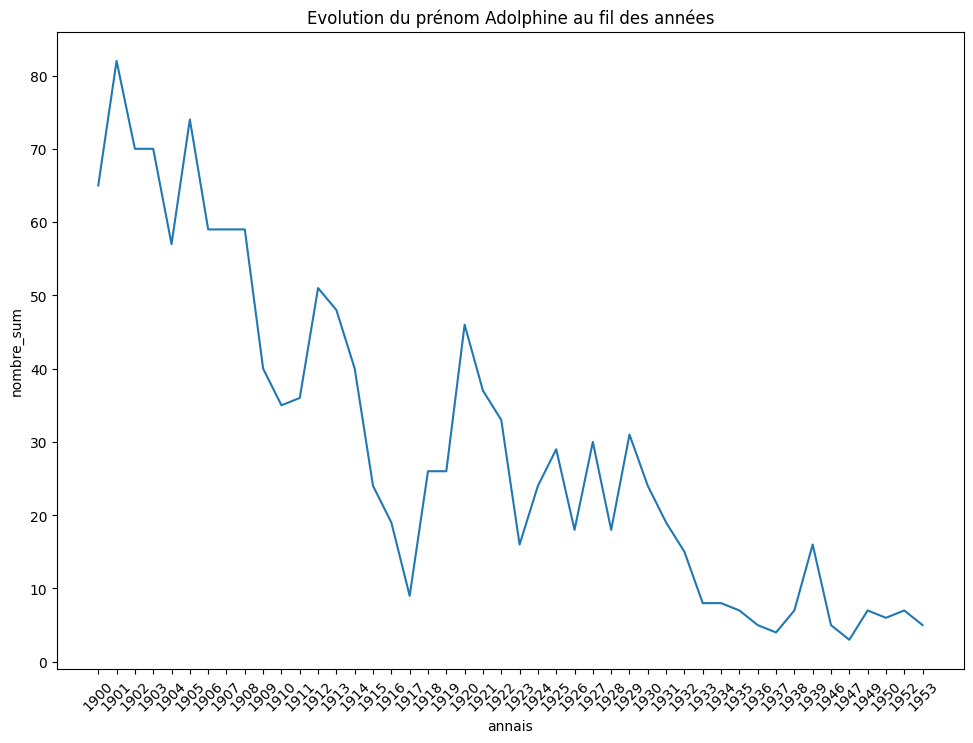

In [26]:
adolphine_data = prenoms_france_data.loc[prenoms_france_data["preusuel"] == "Adolphine"]
adolphine_data = adolphine_data.reset_index(drop=True)
adolphine_data_par_an = adolphine_data.groupby(["annais"])["nombre"].sum().reset_index(name="nombre_sum")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=adolphine_data_par_an, x="annais", y="nombre_sum")
plt.xticks(rotation=45)
plt.title("Evolution du prénom Adolphine au fil des années")
plt.show()

### En 2017, on recensait 13.000 prénoms différents, soit 7,6 fois plus qu’en 1900.

In [27]:
prenoms_data_b.groupby("annais")["preusuel"].nunique()

annais
1900      998
1901     1064
1902     1051
1903     1064
1904     1059
        ...  
2015     4442
2016     4446
2017     4399
2018     4375
XXXX    33483
Name: preusuel, Length: 120, dtype: int64

In [28]:
prenoms_france_data.groupby("annais")["preusuel"].nunique()

annais
1900     998
1901    1064
1902    1051
1903    1064
1904    1059
        ... 
2014    4595
2015    4442
2016    4446
2017    4399
2018    4375
Name: preusuel, Length: 119, dtype: int64

### En 1900, parmi les prénoms recensés par l’Insee, le plus donné, Marie, représentait 11% des naissances.

In [29]:
marie_data = prenoms_data_b.loc[prenoms_data_b["preusuel"] == "MARIE"]
others_data = prenoms_data_b.loc[prenoms_data_b["preusuel"] != "MARIE"]

In [30]:
marie_data_1900 = marie_data.loc[marie_data["annais"] == "1900"]
others_data_1900 = others_data.loc[others_data["annais"] == "1900"]

In [31]:
proportion_marie_to_others = (marie_data_1900["nombre"].sum() / (marie_data_1900["nombre"].sum() + others_data_1900["nombre"].sum()))*100
proportion_marie_to_others

np.float64(12.645641432318671)

### En 2017, des «prénoms rares» ont été donnés à près de 55000 enfants, soit 10 fois plus que le prénom le plus donné (Gabriel).

In [32]:
gabriel_data = prenoms_data_b.loc[prenoms_data_b["preusuel"] == "GABRIEL"]
rare_data = prenoms_data_b.loc[prenoms_data_b["preusuel"] == "_PRENOMS_RARES"]

gabriel_data_2017 = gabriel_data.loc[gabriel_data["annais"] == "2017"]
rare_data_2017 = rare_data.loc[rare_data["annais"] == "2017"]

proportion_gabriel_to_rare = (rare_data_2017["nombre"].sum() / gabriel_data_2017["nombre"].sum())
proportion_gabriel_to_rare

np.float64(9.793776468422022)

In [33]:
rare_data_2017["nombre"].sum()

np.int64(53190)

### Un pic a été atteint en 2012, avec plus de 13.643 prénoms recensés.

### Evolution des prénoms composés contenant Marie au cours du temps (Marie-Pierre, Marie-Paul, ....)?

In [34]:
marie_composes = prenoms_france_data.copy()

marie_composes["preusuel"] = marie_composes["preusuel"].str.capitalize()
marie_composes.loc[marie_composes["preusuel"] == "Anne-marie"]

,sexe,preusuel,annais,dpt,nombre
3902,F,Anne-marie,1900,80,3
3903,F,Anne-marie,1900,75,5
3904,F,Anne-marie,1900,69,4
3907,F,Anne-marie,1900,68,5
3908,F,Anne-marie,1900,64,8
...,...,...,...,...,...
3356631,F,Anne-marie,2014,91,3
3396962,F,Anne-marie,2015,20,3
3467259,F,Anne-marie,2016,75,3
3494050,F,Anne-marie,2017,75,5


In [35]:
filtered_df = marie_composes[marie_composes['preusuel'].str.contains("marie|Marie")==True]
filtered_df

,sexe,preusuel,annais,dpt,nombre
31,F,Marie-françoise,1900,972,4
32,F,Marie-françoise,1900,56,7
33,F,Marie-françoise,1900,29,6
34,F,Marie-françoise,1900,22,3
1207,F,Jeanne-marie,1900,64,5
...,...,...,...,...,...
3567328,M,Pierre-marie,2018,20,9
3576202,F,Anne-marie,2018,13,3
3583107,M,Antoine-marie,2018,20,5
3588159,M,Ange-marie,2018,20,11


### “ 1955-1960 : Les prénoms composés (Marie-Christine, Anne-Marie,...) prennent leur envol”?

### Combien de prénoms faut-il pour nommer 50% des bébés par année (e.g. en 1900 27 prénoms suffisent)?

In [36]:
test_50_percent = prenoms_france_data.copy()

def calculate_50_percent(prenoms_data):

    results = []

    for year in prenoms_data['annais'].unique():
        
        yearly_data = prenoms_data[prenoms_data['annais'] == year]
        total_babies = yearly_data['nombre'].sum()
        threshold = total_babies / 2
        yearly_data = yearly_data.groupby("preusuel")["nombre"].sum().reset_index(name="nombre_sum")
        sorted_yearly_data = yearly_data.sort_values(by='nombre_sum', ascending=False)
        sorted_yearly_data['cumulative_sum'] = sorted_yearly_data['nombre_sum'].cumsum()
    
        top_50_count = sorted_yearly_data[sorted_yearly_data['cumulative_sum'] <= threshold].shape[0] + 1

        results.append({'annais': year, 'count_prenoms_suffisent': top_50_count})

    return pd.DataFrame(results)

results = calculate_50_percent(test_50_percent)
results

,annais,count_prenoms_suffisent
0,1900,24
1,1901,25
2,1902,25
3,1903,25
4,1904,25
...,...,...
114,2014,104
115,2015,105
116,2016,105
117,2017,108


In [37]:
test_50_percent = prenoms_france_data.copy()

def calculate_50_percent(prenoms_data):

    results = []
    count = 0

    for year in prenoms_data['annais'].unique():
        
        yearly_data = prenoms_data[prenoms_data['annais'] == year]
        total_babies = yearly_data['nombre'].sum()
        threshold = total_babies / 2
        yearly_data = yearly_data.groupby("preusuel")["nombre"].sum().reset_index(name="nombre_sum")
        sorted_yearly_data = yearly_data.sort_values(by='nombre_sum', ascending=False)
        sorted_yearly_data['cumulative_sum'] = sorted_yearly_data['nombre_sum'].cumsum()

        for idx, row in sorted_yearly_data.iterrows():

            if row["cumulative_sum"] <= threshold:
                count += 1
            else:
                count += 1
                break
    
        results.append({'annais': year, 'count_prenoms_suffisent': count})
        count = 0

    return pd.DataFrame(results)

results = calculate_50_percent(test_50_percent)
results

,annais,count_prenoms_suffisent
0,1900,24
1,1901,25
2,1902,25
3,1903,25
4,1904,25
...,...,...
114,2014,104
115,2015,105
116,2016,105
117,2017,108


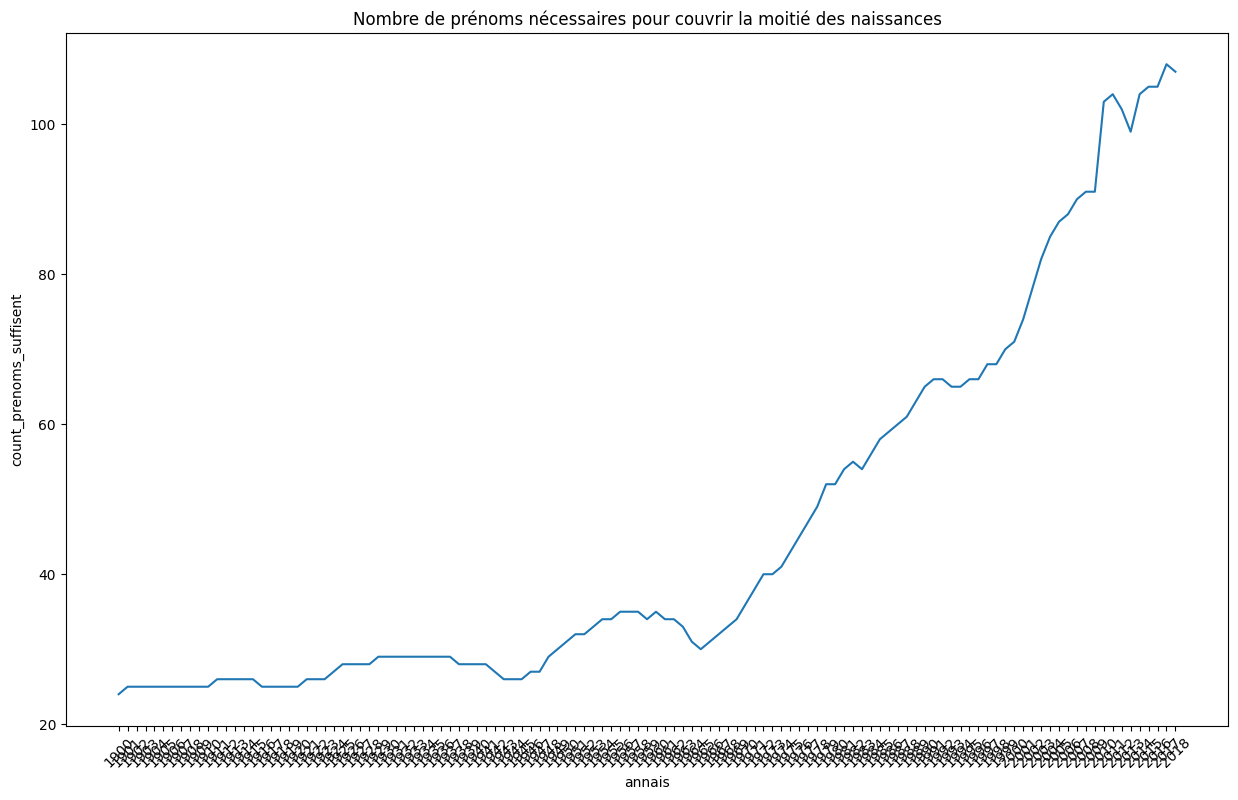

In [40]:
a4_dims = (15, 9)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=results, x="annais", y="count_prenoms_suffisent")
plt.xticks(rotation=45)
plt.title("Nombre de prénoms nécessaires pour couvrir la moitié des naissances")
plt.show()

### La part des 10 prénoms les plus utilisés a-t-elle bien été divisée par 5 entre 1900 et aujourd’hui?

In [41]:
auj_et_1900 = prenoms_france_data.copy()

def top_10_share_for_year(prenoms_data, year):

    yearly_data = prenoms_data[prenoms_data['annais'] == year]
    total_babies = yearly_data['nombre'].sum()
    yearly_data = yearly_data.groupby("preusuel")["nombre"].sum().reset_index(name="nombre_sum")
    top_10_prenoms = yearly_data.nlargest(10, 'nombre_sum')
    top_10_share = top_10_prenoms['nombre_sum'].sum() / total_babies

    return top_10_share

share_1900 = top_10_share_for_year(auj_et_1900, '1900')
share_today = top_10_share_for_year(auj_et_1900, '2017')

print(f"Part des 10 prénoms les plus utilisés en 1900: {share_1900:.2%}")
print(f"Part des 10 prénoms les plus utilisés aujourd'hui: {share_today:.2%}")

proportion_factor = share_1900 / share_today
print(f"La part des 10 prénoms les plus utilisés a été divisée par {proportion_factor:.2f} entre 1900 et aujourd'hui.")

Part des 10 prénoms les plus utilisés en 1900: 33.11%
Part des 10 prénoms les plus utilisés aujourd'hui: 16.13%
La part des 10 prénoms les plus utilisés a été divisée par 2.05 entre 1900 et aujourd'hui.


In [42]:
les_plus_utilises = prenoms_france_data.copy()

def top_10_for_year(prenoms_data):

    results_per_year = []

    for year in prenoms_data["annais"].unique():

        yearly_data = prenoms_data[prenoms_data['annais'] == year]
        total_babies = yearly_data['nombre'].sum()
        yearly_data = yearly_data.groupby("preusuel")["nombre"].sum().reset_index(name="nombre_sum")
        top_10_prenoms = yearly_data.nlargest(10, 'nombre_sum')
        top_10_share = (top_10_prenoms['nombre_sum'].sum() / total_babies)*100

        results_per_year.append({'annais': year, 'top_10_share': top_10_share})

    return pd.DataFrame(results_per_year)

results_per_year = top_10_for_year(les_plus_utilises)
results_per_year

,annais,top_10_share
0,1900,33.107881
1,1901,32.876414
2,1902,32.709750
3,1903,32.161752
4,1904,31.710899
...,...,...
114,2014,15.379533
115,2015,15.636795
116,2016,16.055724
117,2017,16.128239


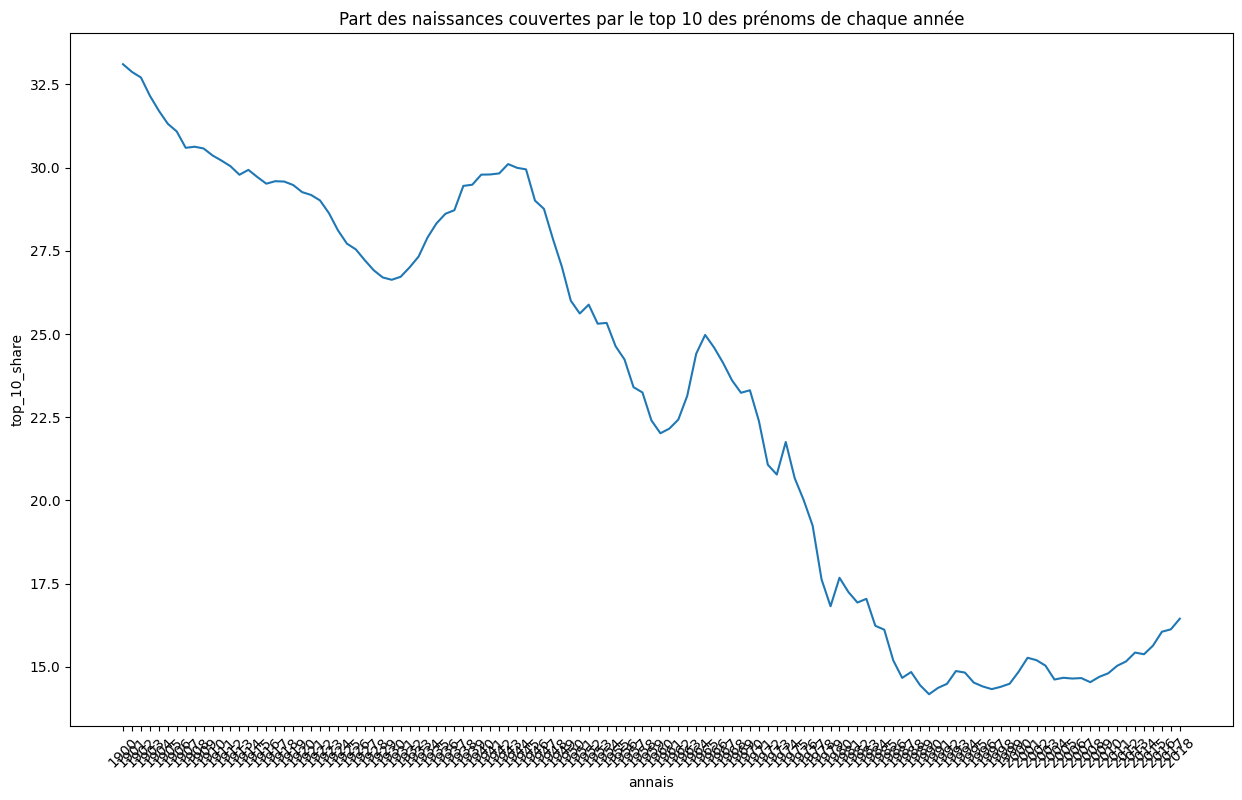

In [43]:
a4_dims = (15, 9)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=results_per_year, x="annais", y="top_10_share")
plt.xticks(rotation=45)
plt.title("Part des naissances couvertes par le top 10 des prénoms de chaque année")
plt.show()

In [44]:
les_plus_utilises = prenoms_france_data.copy()

def top_10_for_year(prenoms_data):

    final_df = pd.DataFrame()
    count = 0

    for year in prenoms_data["annais"].unique():

        results_per_year = pd.DataFrame(columns=['annais'])

        yearly_data = prenoms_data[prenoms_data['annais'] == year]
        total_babies = yearly_data['nombre'].sum()
        yearly_data = yearly_data.groupby("preusuel")["nombre"].sum().reset_index(name="nombre_sum")
        results_per_year.loc[count,:] = year

        for n in range(1, 11):

                col_name = "top_" + str(n) + "_share"

                top_n_prenoms = yearly_data.nlargest(n, 'nombre_sum')
                top_n_share = (top_n_prenoms['nombre_sum'].sum() / total_babies)*100

                #results_per_year.loc[:, col_name] = top_n_share
                results_per_year[col_name] = top_n_share

        
        final_df = pd.concat([final_df, results_per_year])
        count += 1

    return final_df

top_n_share_per_year = top_10_for_year(les_plus_utilises)
top_n_share_per_year

,annais,top_1_share,top_2_share,top_3_share,top_4_share,top_5_share,top_6_share,top_7_share,top_8_share,top_9_share,top_10_share
0,1900,12.645641,16.229488,19.783088,22.083613,24.131743,26.028132,27.873178,29.647309,31.405935,33.107881
1,1901,12.316900,15.938592,19.404399,21.734780,23.821491,25.780345,27.609952,29.390687,31.146869,32.876414
2,1902,11.914996,15.602429,18.965230,21.315383,23.365684,25.389402,27.267136,29.111303,30.919425,32.709750
3,1903,11.518182,15.219655,18.581923,20.817763,22.850752,24.831349,26.756644,28.578945,30.385350,32.161752
4,1904,11.178448,14.886432,18.149247,20.428491,22.446411,24.416838,26.358813,28.166625,29.943358,31.710899
...,...,...,...,...,...,...,...,...,...,...,...
114,2014,8.328043,9.209640,10.073351,10.875829,11.664932,12.421001,13.174976,13.922021,14.654564,15.379533
115,2015,8.548604,9.486124,10.341615,11.174856,11.963263,12.717630,13.468509,14.199131,14.921450,15.636795
116,2016,8.878088,9.878152,10.735618,11.539589,12.331803,13.113115,13.891870,14.639108,15.350397,16.055724
117,2017,9.271768,10.218468,11.056744,11.824598,12.554103,13.283084,14.008580,14.717690,15.424185,16.128239


In [45]:
top_n_share_per_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   annais        119 non-null    object 
 1   top_1_share   119 non-null    float64
 2   top_2_share   119 non-null    float64
 3   top_3_share   119 non-null    float64
 4   top_4_share   119 non-null    float64
 5   top_5_share   119 non-null    float64
 6   top_6_share   119 non-null    float64
 7   top_7_share   119 non-null    float64
 8   top_8_share   119 non-null    float64
 9   top_9_share   119 non-null    float64
 10  top_10_share  119 non-null    float64
dtypes: float64(10), object(1)
memory usage: 11.2+ KB


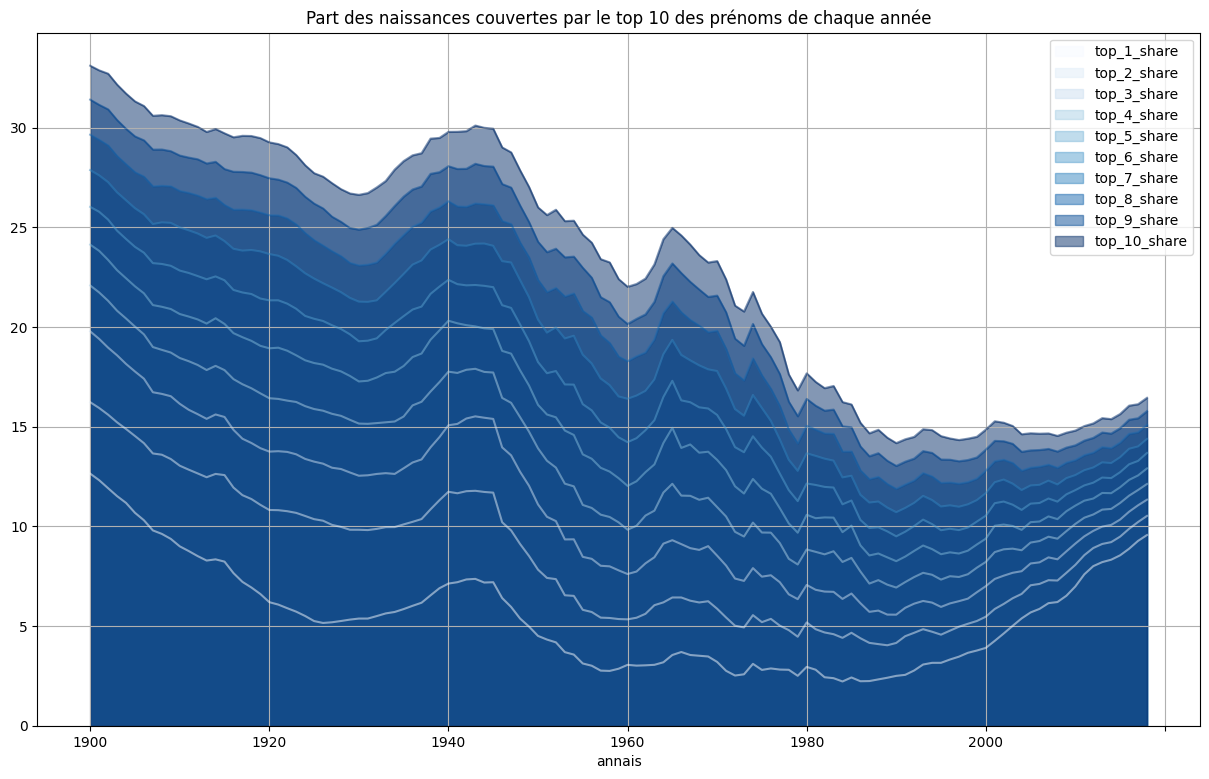

In [46]:
top_n_share_per_year.plot(x="annais",
                          y=["top_1_share", "top_2_share", "top_3_share", "top_4_share", "top_5_share",
                             "top_6_share", "top_7_share", "top_8_share", "top_9_share", "top_10_share"],
                          figsize=(15,9),
                          grid=True,
                          kind="area",
                          colormap="Blues",
                          stacked=False
                          )
plt.title("Part des naissances couvertes par le top 10 des prénoms de chaque année")
plt.show()

### “2015 : Les prénoms rares forment la première catégorie de prénoms“

In [47]:
categorie_de_prenoms = prenoms_france_data.copy()

def categories_de_prenoms(prenoms_data):

    final_df = pd.DataFrame()
    count = 0

    for year in prenoms_data["annais"].unique():

        results_per_year = pd.DataFrame(columns=['annais'])

        yearly_data = prenoms_data[prenoms_data['annais'] == year]
        total_babies = yearly_data['nombre'].sum()
        yearly_data = yearly_data.groupby("preusuel")["nombre"].sum().reset_index(name="nombre_sum")
        results_per_year.loc[count,:] = year

        top_n_prenoms = yearly_data.nlargest(1, 'nombre_sum')
        top_n_share = (top_n_prenoms['nombre_sum'].sum() / total_babies)*100

        results_per_year["top_1_share"] = top_n_share
        results_per_year["preusuel"] = top_n_prenoms["preusuel"].values[0]
       
        final_df = pd.concat([final_df, results_per_year])
        count += 1

    return final_df

top_categorie_de_prenom = categories_de_prenoms(categorie_de_prenoms)
top_categorie_de_prenom

,annais,top_1_share,preusuel
0,1900,12.645641,Marie
1,1901,12.316900,Marie
2,1902,11.914996,Marie
3,1903,11.518182,Marie
4,1904,11.178448,Marie
...,...,...,...
114,2014,8.328043,_prenoms_rares
115,2015,8.548604,_prenoms_rares
116,2016,8.878088,_prenoms_rares
117,2017,9.271768,_prenoms_rares


In [49]:
top_categorie_de_prenom.loc[top_categorie_de_prenom["annais"] == "2015"]

,annais,top_1_share,preusuel
115,2015,8.548604,_prenoms_rares


### À l’échelle régionale, le prénom Loïc, très populaire entre 1975 et 2000, constitue un bon exemple de cette circulation des prénoms. Cantonné à la Bretagne jusque dans les années 1980, il a essaimé en France jusqu’à être davantage donné dans d’autres régions, s’effaçant en Bretagne.

### De même, les Erwan, Enora (bretons), Maelys (occitan) courent dans toute la France, tout comme les Wilfried (anglo-saxon), Enzo, Nino (italiens), Medhi, Inès (arabes) ou Lola(espagnol) ont fait leur trou. À l’inverse, les Armel (breton), Maite (basque), Giulia (italien) restent majoritairement limités à une région.

In [50]:
dpt_prenom_data = prenoms_france_data.copy()

In [51]:
dpt_prenom_data = dpt_prenom_data.groupby(["annais", "preusuel"]).agg({"dpt": lambda x: x.nunique()}).reset_index()
dpt_prenom_data

,annais,preusuel,dpt
0,1900,Abel,51
1,1900,Abraham,2
2,1900,Achille,18
3,1900,Achilles,1
4,1900,Adam,1
...,...,...,...
240549,2018,Ézio,1
240550,2018,Ézéchiel,2
240551,2018,Ézékiel,2
240552,2018,Îmran,1


In [52]:
loic_data = dpt_prenom_data.loc[dpt_prenom_data["preusuel"] == "Loïc"]
loic_data

,annais,preusuel,dpt
29279,1926,Loïc,1
31826,1928,Loïc,1
33070,1929,Loïc,1
36880,1932,Loïc,1
38075,1933,Loïc,5
...,...,...,...
220805,2014,Loïc,40
225337,2015,Loïc,43
229788,2016,Loïc,40
234211,2017,Loïc,28


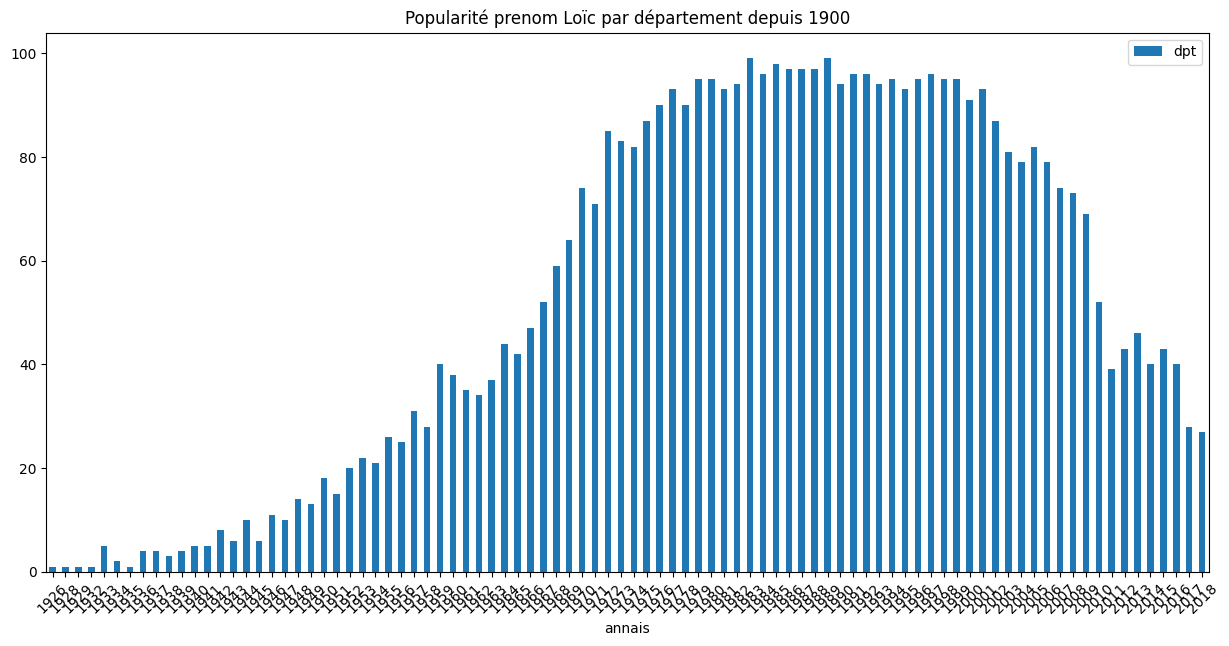

In [53]:
ax = loic_data.plot.bar(x="annais",
                        y="dpt",
                        rot=0,
                        figsize=(15,7))
plt.xticks(rotation=45)
plt.title("Popularité prenom Loïc par département depuis 1900")
plt.show()

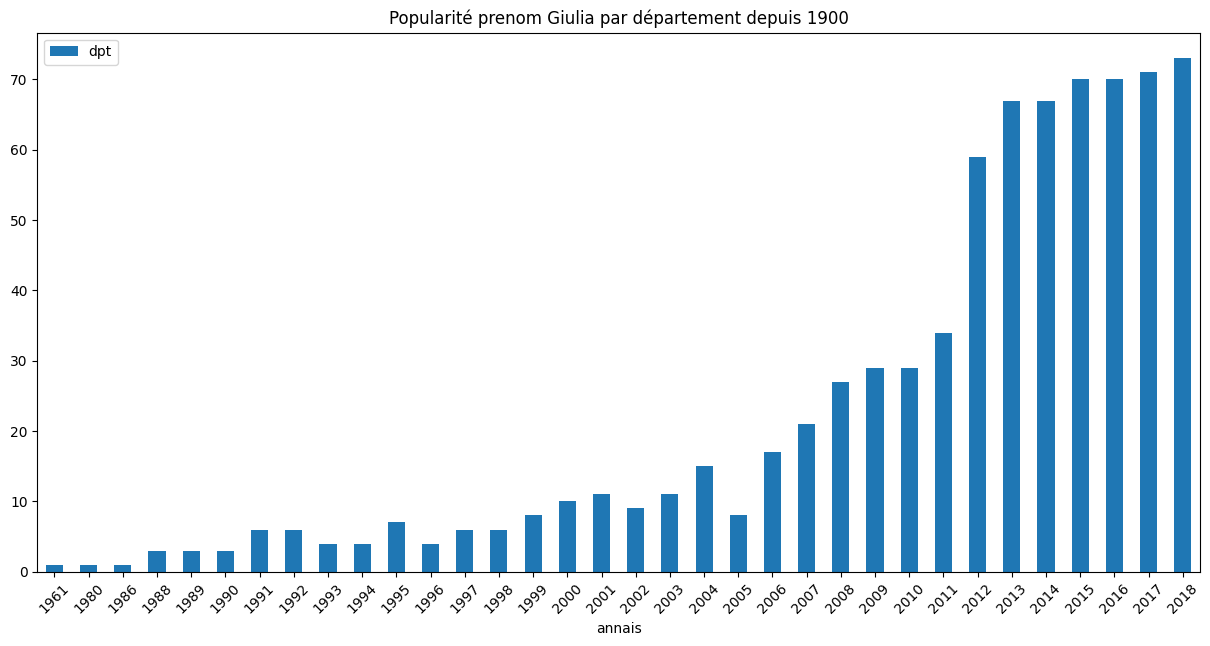

In [54]:
giulia_data = dpt_prenom_data.loc[dpt_prenom_data["preusuel"] == "Giulia"]

ax = giulia_data.plot.bar(x="annais",
                        y="dpt",
                        rot=0,
                        figsize=(15,7))
plt.xticks(rotation=45)
plt.title("Popularité prenom Giulia par département depuis 1900")
plt.show()